<a href="https://colab.research.google.com/github/jiwon5315/BusinessAnalystPortfolio/blob/main/PrescriptiveAnalytics/Landing_Page_A_B_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataCamp Competition**: Which version of the website should you use?

📖 **Background**
You work for an early-stage startup in Germany. Your team has been working on a redesign of the landing page. The team believes a new design will increase the number of people who click through and join your site.

They have been testing the changes for a few weeks, and now they want to measure the impact of the change and need you to determine if the increase can be due to random chance or if it is statistically significant.

💾 **The data**
The team assembled the following file:
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

✅ **Goal**
1. Analyze the conversion rates for each of the four groups: the new/old design of the landing page and the new/old pictures.
2. Can the increases observed be explained by randomness? (Hint: Think A/B test)
3. Which version of the website should they use?

In [12]:
#Load packages and dataset
library(tidyr)
library(ggplot2)
install.packages('caret')
library(caret)
df <- read.csv('redesign.csv')
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



,treatment,new_images,converted
,<chr>,<chr>,<int>
1,yes,yes,0
2,yes,yes,0
3,yes,yes,0
4,yes,no,0
5,no,yes,0
6,yes,no,0


In [37]:
#How many people converted overall?
converted_yes <- df %>% count(df$converted > 0)
converted_yes

df$converted > 0,n
<lgl>,<int>
FALSE,35895
TRUE,4589


Almost **13%** of the people converted - meaning that they clicked on the landing page and joined the site! Considering that the average landing page conversion rate across all industries is 5.89% ([HubSpot](https://blog.hubspot.com/marketing/landing-page-stats#:~:text=The%20average%20landing%20page%20conversion,you%20and%20your%20target%20audience.)), this is a great performance rate.
Now the question is *which version of the landing page was more effective?*

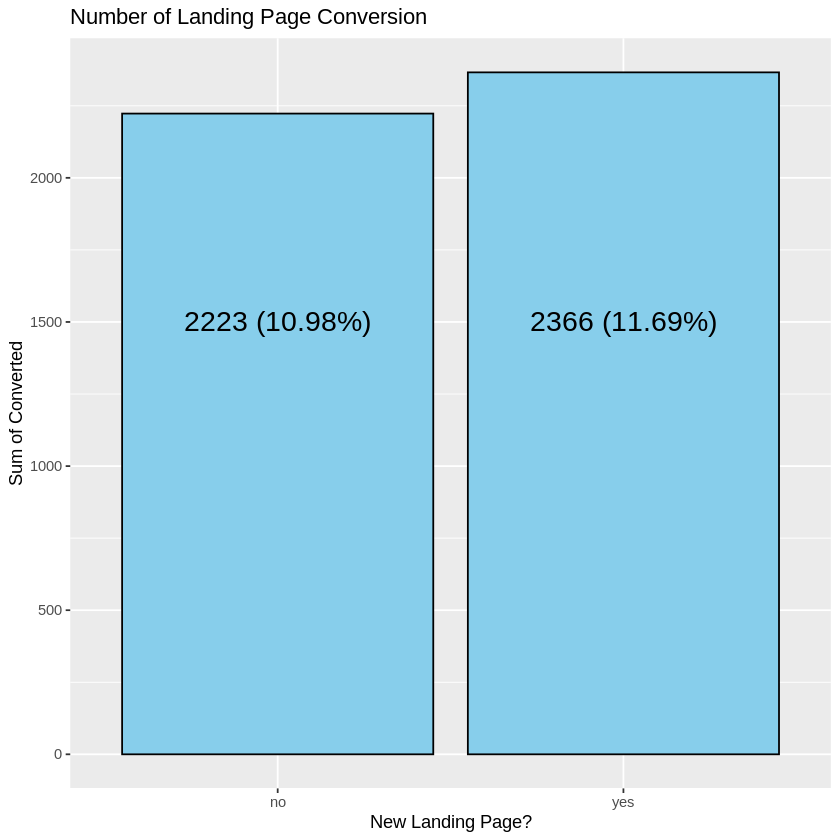

In [159]:
treatment_yes <- df %>% subset(treatment=="yes")
treatment_no <- df %>% subset(treatment=="no")
treatment_converted <- sum(treatment_yes$converted)
notreatment_converted <- sum(treatment_no$converted)
#The new landing page has a conversion rate of 11.69%
#The original landing page has a conversion rate of 10.98%
viz <- df %>% group_by(treatment) %>%
  summarize(sum_converted = sum(converted))
annotation <- data.frame(
   x = c(1,2),
   y = c(1500,1500),
   label = c("2223 (10.98%)", "2366 (11.69%)")
)

# Bar plot for conversion
ggplot(viz, aes(x = treatment, y = sum_converted)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Number of Landing Page Conversion",
       x = "New Landing Page?",
       y = "Sum of Converted") +
geom_text(data=annotation, aes( x=x, y=y, label=label),                 ,
      color="black",
      size=6 )


There were 20,242 people in both groups, but the new landing page had more people click and sign up - **143 people** to be exact. But does this really mean that the new landing page was better or could this result be by random chance? *In other words, is this number statistically significant for us to justify switching to the new landing page?*

In [105]:
# Original landing page with old pictures
control_old <- df %>%
    filter(treatment == "no" & new_images == "no")
converted_co <- sum(control_old$converted)
rate_co <- round(sum(control_old$converted)/count(control_old)*100,2)
print("Results for Original Landing Page with Old Pictures")
print(paste0("▷ Number of ppl converted: ", converted_co))
print(paste0("▷ Conversion rate:  ", rate_co, "%"))

#Original landing page with new pictures
control_new <- df %>%
    filter(treatment == "no" & new_images == "yes")
converted_cn <- sum(control_new$converted)
rate_cn <- round(sum(control_new$converted)/count(control_new)*100,2)
lift_cn <- round((rate_cn-rate_co)/rate_co*100,2)
print("Results for Original Landing Page with New Pictures")
print(paste0("▷ Number of ppl converted: ", converted_cn))
print(paste0("▷ Conversion rate:  ", rate_cn, "%"))
print(paste0("▷ Conversion Lift: ", lift_cn,"%"))

#New landing page with old pictures
treatment_old <- df %>%
    filter(treatment == "yes" & new_images == "no")
converted_to <- sum(treatment_old$converted)
rate_to <- round(sum(treatment_old$converted)/count(treatment_old)*100,2)
lift_to <- round((rate_to-rate_co)/rate_co*100,2)
print("Results for New Landing Page with Old Pictures")
print(paste0("▷ Number of ppl converted: ", converted_to))
print(paste0("▷ Conversion rate:  ", rate_to, "%"))
print(paste0("▷ Conversion Lift: ", lift_to,"%"))

#New landing page with new pictures
treatment_new <- df %>%
    filter(treatment == "yes" & new_images == "yes")
converted_tn <- sum(treatment_new$converted)
rate_tn <- round(sum(treatment_new$converted)/count(treatment_new)*100,2)
lift_tn <- round((rate_tn-rate_co)/rate_co*100,2)
print("Results for New Landing Page with New Pictures")
print(paste0("▷ Number of ppl converted: ", converted_tn))
print(paste0("▷ Conversion rate:  ", rate_tn, "%"))
print(paste0("▷ Conversion Lift: ", lift_tn,"%"))

[1] "Results for Original Landing Page with Old Pictures"
[1] "▷ Number of ppl converted: 1084"
[1] "▷ Conversion rate:  10.71%"
[1] "Results for Original Landing Page with New Pictures"
[1] "▷ Number of ppl converted: 1139"
[1] "▷ Conversion rate:  11.25%"
[1] "▷ Conversion Lift: 5.04%"
[1] "Results for New Landing Page with Old Pictures"
[1] "▷ Number of ppl converted: 1215"
[1] "▷ Conversion rate:  12%"
[1] "▷ Conversion Lift: 12.04%"
[1] "Results for New Landing Page with New Pictures"
[1] "▷ Number of ppl converted: 1151"
[1] "▷ Conversion rate:  11.37%"
[1] "▷ Conversion Lift: 6.16%"


Conversion lift tests help you measure how many of your conversions are directly caused by the changes. Our baseline is the original landing page with old photos; it had a conversion rate of 10.71%.

To calculate the lift, we subtract the treatment conversion rate and the control conversation rate divided by the control conversion rate. Compared to the baseline, we can see that the **new landing page with old pictures had a lift of 12.04%**. This means the changes made achieved a 12% greater conversion rate compared to the baseline. Since other variations only produced 5-6% lift, this is considerably higher.

In [110]:
#Perform one-way ANOVA
model <- aov(converted ~ treatment + new_images, data = df)
summary(model)

               Df Sum Sq Mean Sq F value Pr(>F)  
treatment       1      1  0.5051   5.026  0.025 *
new_images      1      0  0.0020   0.020  0.888  
Residuals   40481   4068  0.1005                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [115]:
#T-Test for Treatment
df$treatment <- factor(df$treatment)
yes_data <- df[df$treatment == "yes", "converted"]  # converted values for treatment "yes"
no_data <- df[df$treatment == "no", "converted"]    # converted values for treatment "no"
t.test(yes_data, no_data)
#T-Test for new_images in New Landing Pages
treatment_yes$new_images <- factor(treatment_yes$new_images)
yes_photos <- treatment_yes[treatment_yes$new_images == "yes", "converted"]  # converted values for new_images "yes"
no_photos <- treatment_yes[treatment_yes$new_images == "no", "converted"]    # converted values for old_images "no"
t.test(yes_photos, no_photos)
#T-Test for new_images Overall (Old & New Landing Pages)
df$new_images <- factor(df$new_images)
yes_photos_df <- df[df$new_images == "yes", "converted"]  # converted values for new_images "yes"
no_photos_df <- df[df$new_images == "no", "converted"]    # converted values for old_images "no"
t.test(yes_photos_df, no_photos_df)


	Welch Two Sample t-test

data:  yes_data and no_data
t = 2.2419, df = 40452, p-value = 0.02497
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.000888257 0.013240782
sample estimates:
mean of x mean of y 
0.1168857 0.1098212 



	Welch Two Sample t-test

data:  yes_photos and no_photos
t = -1.4001, df = 20229, p-value = 0.1615
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.015176006  0.002529034
sample estimates:
mean of x mean of y 
0.1137239 0.1200474 



	Welch Two Sample t-test

data:  yes_photos_df and no_photos_df
t = -0.14109, df = 40482, p-value = 0.8878
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.006621264  0.005732024
sample estimates:
mean of x mean of y 
0.1131311 0.1135757 


'Treatment' has a p-value of 0.025, which means that **there is statistical difference between the control and treatment group**. On the other hand, 'new_images' had a p-value higher than 0.05, which means there is lack of evidence for us to dismiss the null hypothesis; there is no significant difference between old and new images used.

**Conclusion:** With a 12% uplift rate and statistically significant difference between control and treatment group, the company should use the new landing page with the old photos.

